In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [49]:
df_s = pd.read_csv('products_sentiment_train.csv', delimiter=',')
df_s.head()

,N,name,price,url,pages,size1,size2,size3,weight,cover,year,description
0,1,Чисто российское преступление: Самые громкие и...,540.0,https://www.chitai-gorod.ru/product/chisto-ros...,298.0,1.7,14.6,21.6,460,Твёрдый переплёт,2024.0,В новой книге известной правозащитницы и жур...
1,2,Безлюдное место: Как ловят маньяков в России,539.0,https://www.chitai-gorod.ru/product/bezlyudnoe...,264.0,1.4,14.0,21.0,330,Мягкий переплёт,2023.0,С середины 1990-х в небольшом сибирском городе...
2,3,Письма о добром и прекрасном,238.0,https://www.chitai-gorod.ru/product/pisma-o-do...,192.0,1.5,11.6,18.1,129,Мягкий переплёт,2024.0,"«Письма о добром и прекрасном» – книга, котору..."
3,4,У холмов есть подкаст. 24 истории о серийных у...,715.0,https://www.chitai-gorod.ru/product/u-holmov-e...,448.0,2.7,13.0,20.7,430,Твёрдый переплёт,2024.0,"Первая книга Тимы и Вали Назаровых, авторов са..."
4,5,Фундаментальные законы человеческой глупости,605.0,https://www.chitai-gorod.ru/product/fundamenta...,160.0,1.8,13.3,17.3,176,Твёрдый переплёт,2024.0,Впервые остроумно и изящно сформулированы зако...


In [50]:
df_s

,N,name,price,url,pages,size1,size2,size3,weight,cover,year,description
0,1,Чисто российское преступление: Самые громкие и...,540.0,https://www.chitai-gorod.ru/product/chisto-ros...,298.0,1.7,14.6,21.6,460,Твёрдый переплёт,2024.0,В новой книге известной правозащитницы и жур...
1,2,Безлюдное место: Как ловят маньяков в России,539.0,https://www.chitai-gorod.ru/product/bezlyudnoe...,264.0,1.4,14.0,21.0,330,Мягкий переплёт,2023.0,С середины 1990-х в небольшом сибирском городе...
2,3,Письма о добром и прекрасном,238.0,https://www.chitai-gorod.ru/product/pisma-o-do...,192.0,1.5,11.6,18.1,129,Мягкий переплёт,2024.0,"«Письма о добром и прекрасном» – книга, котору..."
3,4,У холмов есть подкаст. 24 истории о серийных у...,715.0,https://www.chitai-gorod.ru/product/u-holmov-e...,448.0,2.7,13.0,20.7,430,Твёрдый переплёт,2024.0,"Первая книга Тимы и Вали Назаровых, авторов са..."
4,5,Фундаментальные законы человеческой глупости,605.0,https://www.chitai-gorod.ru/product/fundamenta...,160.0,1.8,13.3,17.3,176,Твёрдый переплёт,2024.0,Впервые остроумно и изящно сформулированы зако...
...,...,...,...,...,...,...,...,...,...,...,...,...
1243,1244,Полутороглазый стрелец,NaN,https://www.chitai-gorod.ru/product/polutorogl...,298.0,1.2,14.7,21.0,310,Мягкий переплёт,2021.0,"Репринт с издания. Ленинград, 1933. Бенедикт Л..."
1244,1245,Полторы комнаты,NaN,https://www.chitai-gorod.ru/product/poltory-ko...,160.0,1.4,17.5,22.7,540,Твёрдый переплёт,2020.0,«Полторы комнаты» — одно из самых известных эс...
1245,1246,Турецкие диалоги. Мировая политика как она ест...,NaN,https://www.chitai-gorod.ru/product/tureckie-d...,256.0,2.5,13.0,20.6,290,Твёрдый переплёт,2023.0,Евгений Сатановский — российский эксперт по Бл...
1246,1247,Тайны Сибири. Земля холодов и необъяснимых заг...,NaN,https://www.chitai-gorod.ru/product/tayny-sibi...,384.0,2.0,13.0,20.5,370,Твёрдый переплёт,2021.0,Сибирь – едва ли одно из самых загадочных мест...


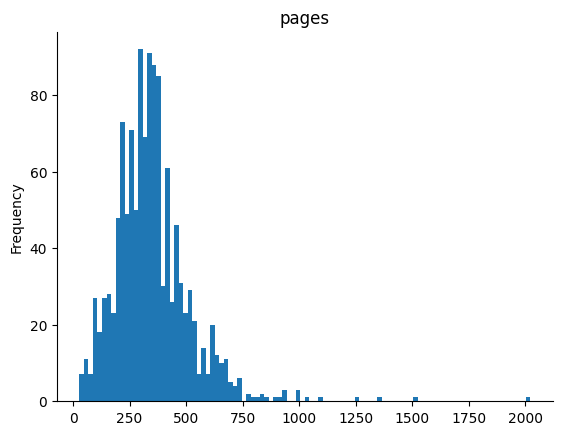

In [51]:
# @title pages

from matplotlib import pyplot as plt
df_s['pages'].plot(kind='hist', bins=100, title='pages')
plt.gca().spines[['top', 'right',]].set_visible(False)

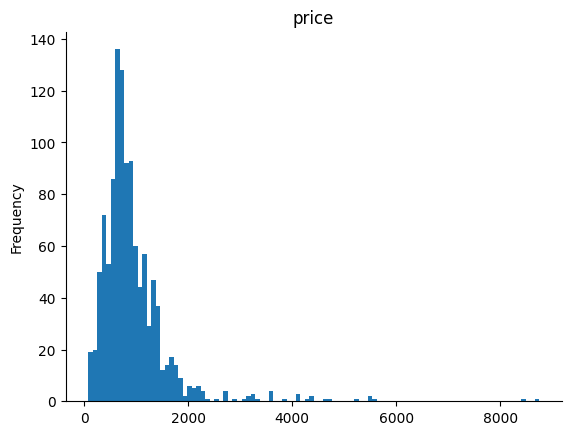

In [52]:
# @title price

from matplotlib import pyplot as plt
df_s['price'].plot(kind='hist', bins=100, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

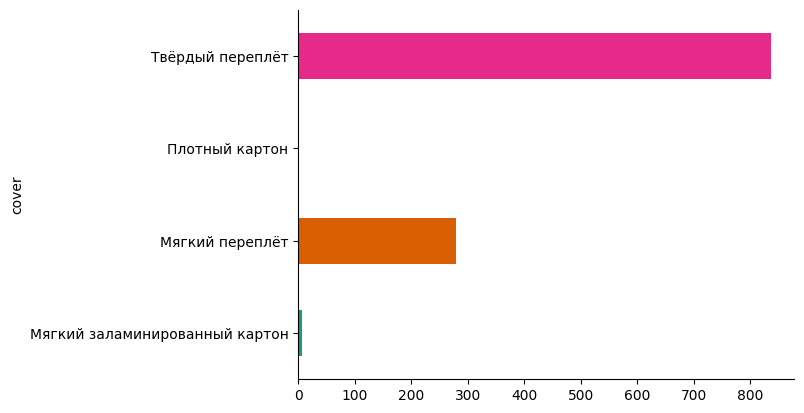

In [53]:
# @title cover

from matplotlib import pyplot as plt
import seaborn as sns
df_s.groupby('cover').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [54]:
df_s.columns

Index(['N', 'name', 'price', 'url', 'pages', 'size1', 'size2', 'size3',
       'weight', 'cover', 'year', 'description'],
      dtype='object')


Удаляем позиции со значением price = None:

In [62]:
df_f = df_s[df_s['price'].notna()]

In [63]:
df_f


,N,name,price,url,pages,size1,size2,size3,weight,cover,year,description,volume
0,1,Чисто российское преступление: Самые громкие и...,540.0,https://www.chitai-gorod.ru/product/chisto-ros...,298.0,1.7,14.6,21.6,460,Твёрдый переплёт,2024.0,В новой книге известной правозащитницы и жур...,536.112
1,2,Безлюдное место: Как ловят маньяков в России,539.0,https://www.chitai-gorod.ru/product/bezlyudnoe...,264.0,1.4,14.0,21.0,330,Мягкий переплёт,2023.0,С середины 1990-х в небольшом сибирском городе...,411.600
2,3,Письма о добром и прекрасном,238.0,https://www.chitai-gorod.ru/product/pisma-o-do...,192.0,1.5,11.6,18.1,129,Мягкий переплёт,2024.0,"«Письма о добром и прекрасном» – книга, котору...",314.940
3,4,У холмов есть подкаст. 24 истории о серийных у...,715.0,https://www.chitai-gorod.ru/product/u-holmov-e...,448.0,2.7,13.0,20.7,430,Твёрдый переплёт,2024.0,"Первая книга Тимы и Вали Назаровых, авторов са...",726.570
4,5,Фундаментальные законы человеческой глупости,605.0,https://www.chitai-gorod.ru/product/fundamenta...,160.0,1.8,13.3,17.3,176,Твёрдый переплёт,2024.0,Впервые остроумно и изящно сформулированы зако...,414.162
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,1142,Нечто: сборник статей,773.0,https://www.chitai-gorod.ru/product/nechto-sbo...,188.0,1.2,15.2,21.5,349,Твёрдый переплёт,2021.0,Константин Николаевич Батюшков - значительная ...,392.160
1142,1143,Корпорацию не нагнешь,844.0,https://www.chitai-gorod.ru/product/korporaciy...,288.0,2.0,13.0,20.0,10,Твёрдый переплёт,2021.0,Сегодня Алексей Иванов — один из самых успешны...,520.000
1143,1144,Европа и Евразия,1149.0,https://www.chitai-gorod.ru/product/evropa-i-e...,346.0,2.0,14.0,21.0,500,NaN,2021.0,NaN,588.000
1144,1145,Исповедь для побежденных : После шестнадцати м...,1989.0,https://www.chitai-gorod.ru/product/ispoved-dl...,346.0,2.0,14.0,21.0,500,NaN,2021.0,NaN,588.000


Работа с нулевыми значениями:

Подсчитываем общий "объем" книги (длина×ширина×толщина)

In [64]:
df_f['volume'] = df_f['size1']*df_f['size2']*df_f['size3']

Расчитываем показатель цена/"объем"

In [65]:
df_f['volume_price']=df_f['price']/df_f['volume']


Расчитываем показатель цена/вес

In [66]:
df_f['weight_price']=df_f['price']/df_f['weight']

Раситываем показатель цена/количество страниц

In [67]:
df_f['page_price']=df_f['price']/df_f['pages']

Создаем правило перевод показателя переплета в двоичную систему

In [16]:
def rule_rating(row):
    if row["cover"] == 'Твёрдый переплёт':
        return 1
    elif row["cover"] == 'Мягкий заламинированный картон':
        return 2
    elif row["cover"] == 'Плотный картон':
        return 3
    else:
        return 0

<ipython-input-69-1be88def5f4e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_f, x='volume_price', y='cover', inner='box', palette='Dark2')


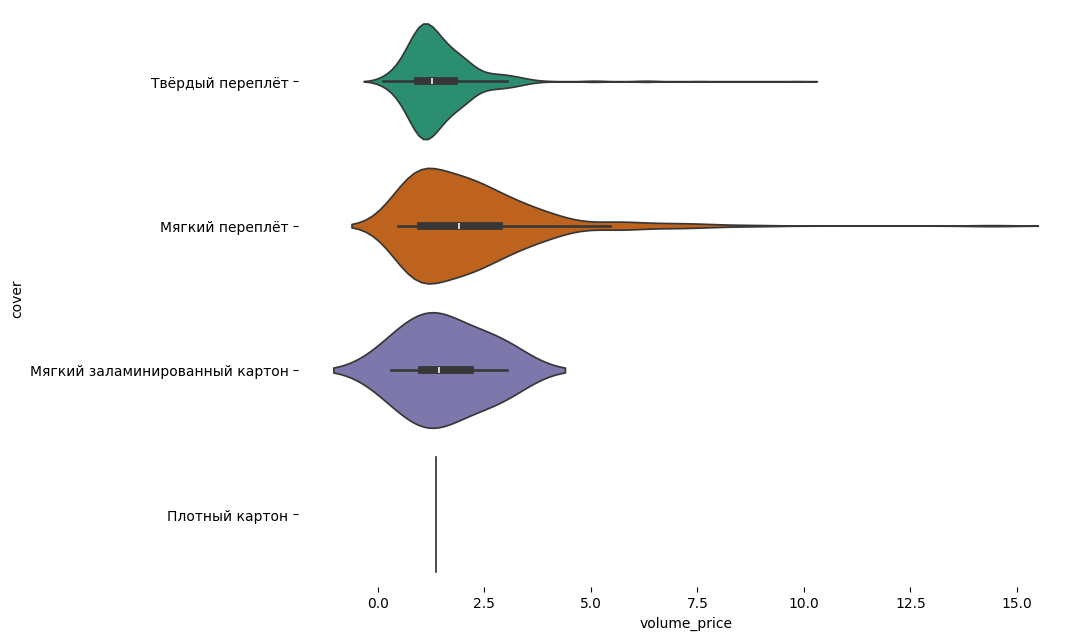

In [69]:
# @title cover vs volume_price

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (10, 1.5 * len(df_f['cover'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_f, x='volume_price', y='cover', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-70-aaf23d6dd040>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_f, x='weight_price', y='cover', inner='box', palette='Dark2')


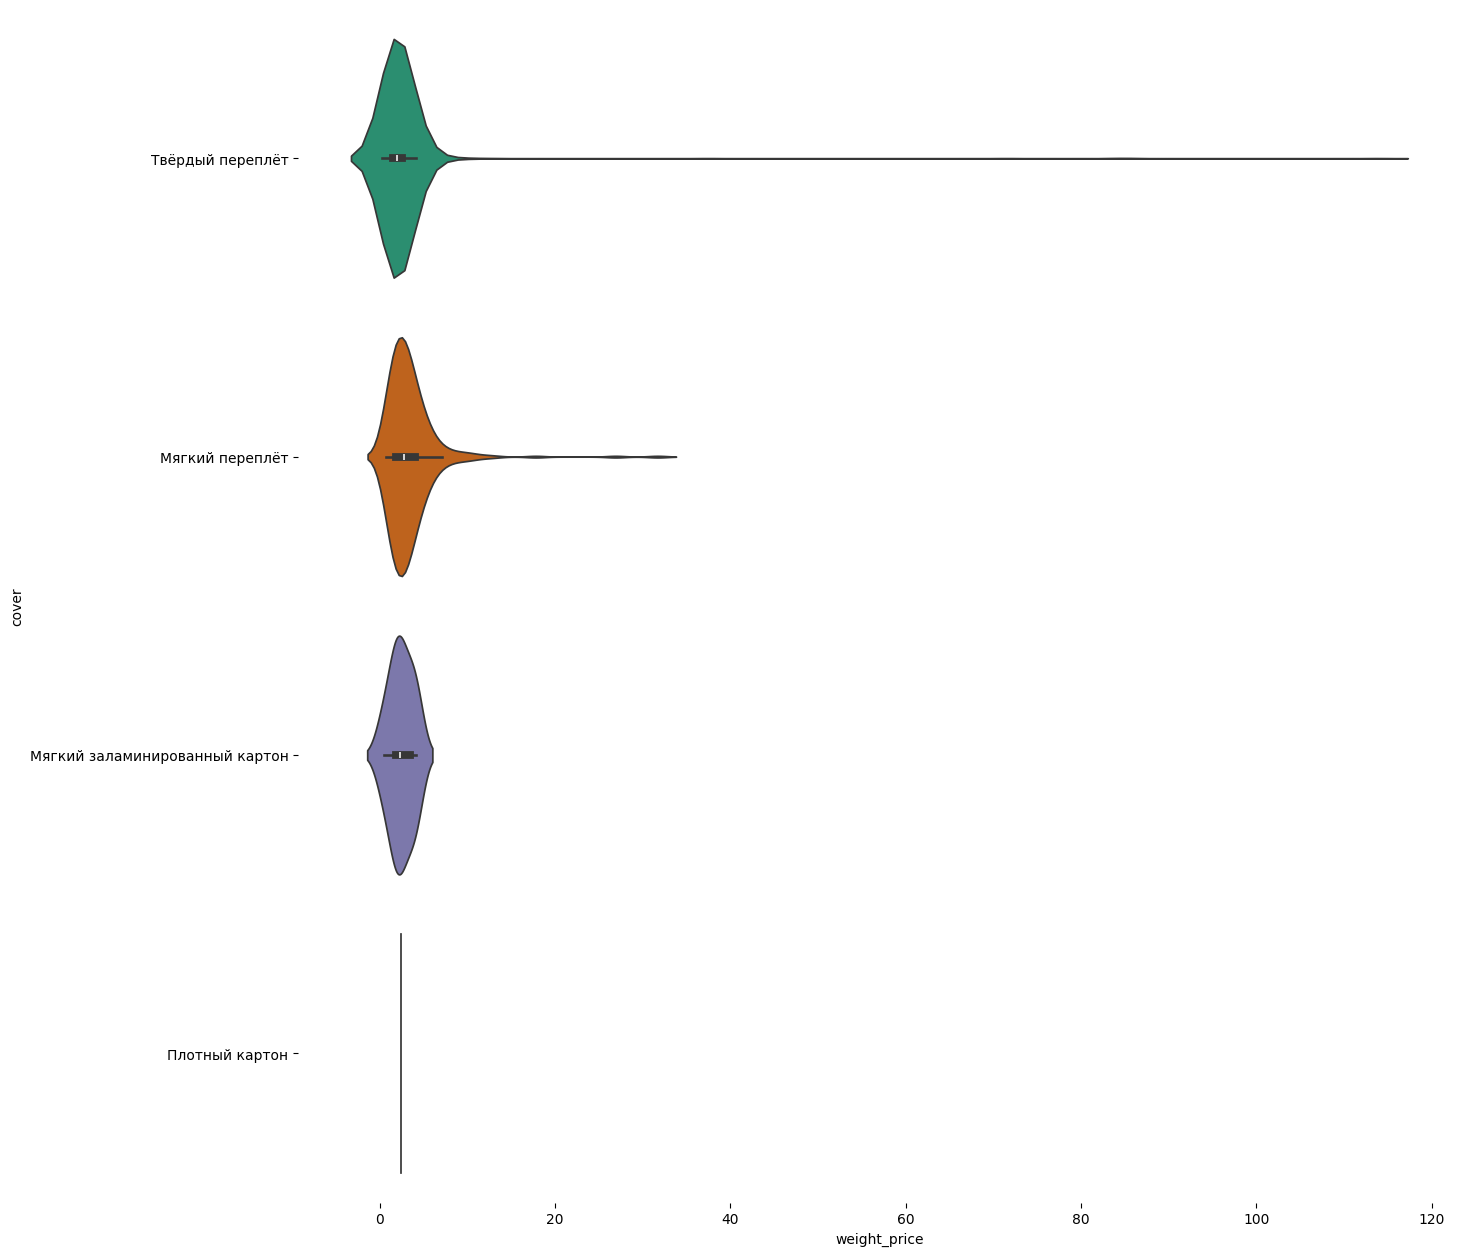

In [70]:
# @title cover vs weight_price

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (15, 3.1 * len(df_f['cover'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_f, x='weight_price', y='cover', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-71-04cd24b04c97>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_f, x='page_price', y='cover', inner='box', palette='Dark2')


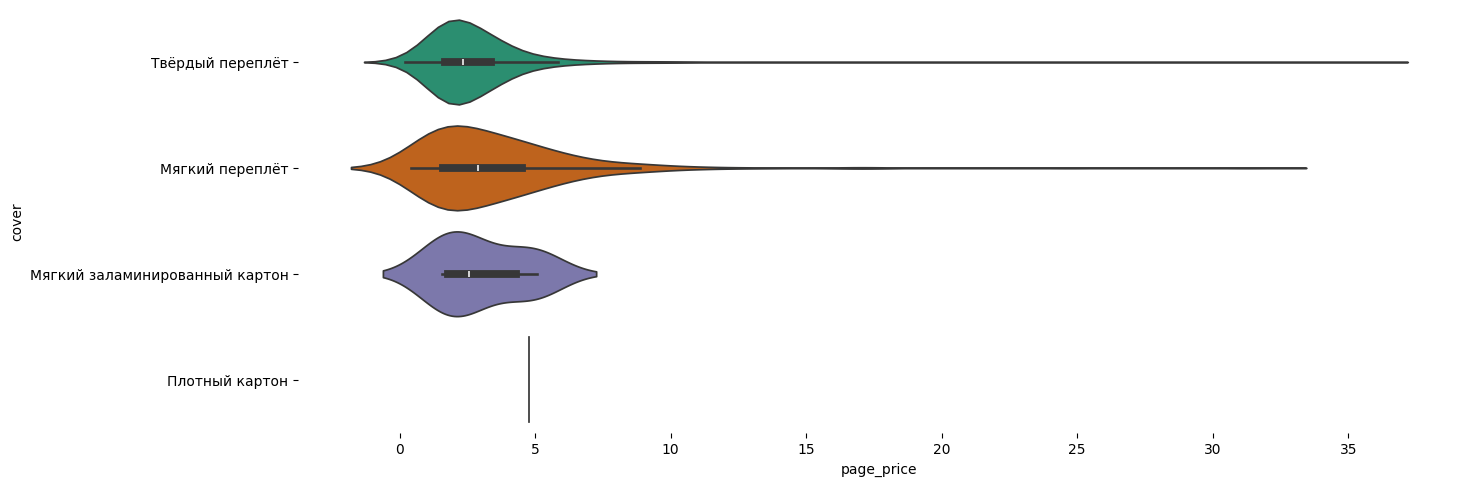

In [71]:
# @title cover vs page_price

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (15, 1.1 * len(df_f['cover'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_f, x='page_price', y='cover', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Переводим значение переплета в двоичную систему

In [72]:
df_f["CoverType"] = df_f.apply(rule_rating, axis=1)

In [73]:
df_f.head()

,N,name,price,url,pages,size1,size2,size3,weight,cover,year,description,volume,volume_price,weight_price,page_price,CoverType
0,1,Чисто российское преступление: Самые громкие и...,540.0,https://www.chitai-gorod.ru/product/chisto-ros...,298.0,1.7,14.6,21.6,460,Твёрдый переплёт,2024.0,В новой книге известной правозащитницы и жур...,536.112,1.007252,1.173913,1.812081,1
1,2,Безлюдное место: Как ловят маньяков в России,539.0,https://www.chitai-gorod.ru/product/bezlyudnoe...,264.0,1.4,14.0,21.0,330,Мягкий переплёт,2023.0,С середины 1990-х в небольшом сибирском городе...,411.600,1.309524,1.633333,2.041667,0
2,3,Письма о добром и прекрасном,238.0,https://www.chitai-gorod.ru/product/pisma-o-do...,192.0,1.5,11.6,18.1,129,Мягкий переплёт,2024.0,"«Письма о добром и прекрасном» – книга, котору...",314.940,0.755699,1.844961,1.239583,0
3,4,У холмов есть подкаст. 24 истории о серийных у...,715.0,https://www.chitai-gorod.ru/product/u-holmov-e...,448.0,2.7,13.0,20.7,430,Твёрдый переплёт,2024.0,"Первая книга Тимы и Вали Назаровых, авторов са...",726.570,0.984076,1.662791,1.595982,1
4,5,Фундаментальные законы человеческой глупости,605.0,https://www.chitai-gorod.ru/product/fundamenta...,160.0,1.8,13.3,17.3,176,Твёрдый переплёт,2024.0,Впервые остроумно и изящно сформулированы зако...,414.162,1.460781,3.437500,3.781250,1


In [74]:
df_f

,N,name,price,url,pages,size1,size2,size3,weight,cover,year,description,volume,volume_price,weight_price,page_price,CoverType
0,1,Чисто российское преступление: Самые громкие и...,540.0,https://www.chitai-gorod.ru/product/chisto-ros...,298.0,1.7,14.6,21.6,460,Твёрдый переплёт,2024.0,В новой книге известной правозащитницы и жур...,536.112,1.007252,1.173913,1.812081,1
1,2,Безлюдное место: Как ловят маньяков в России,539.0,https://www.chitai-gorod.ru/product/bezlyudnoe...,264.0,1.4,14.0,21.0,330,Мягкий переплёт,2023.0,С середины 1990-х в небольшом сибирском городе...,411.600,1.309524,1.633333,2.041667,0
2,3,Письма о добром и прекрасном,238.0,https://www.chitai-gorod.ru/product/pisma-o-do...,192.0,1.5,11.6,18.1,129,Мягкий переплёт,2024.0,"«Письма о добром и прекрасном» – книга, котору...",314.940,0.755699,1.844961,1.239583,0
3,4,У холмов есть подкаст. 24 истории о серийных у...,715.0,https://www.chitai-gorod.ru/product/u-holmov-e...,448.0,2.7,13.0,20.7,430,Твёрдый переплёт,2024.0,"Первая книга Тимы и Вали Назаровых, авторов са...",726.570,0.984076,1.662791,1.595982,1
4,5,Фундаментальные законы человеческой глупости,605.0,https://www.chitai-gorod.ru/product/fundamenta...,160.0,1.8,13.3,17.3,176,Твёрдый переплёт,2024.0,Впервые остроумно и изящно сформулированы зако...,414.162,1.460781,3.437500,3.781250,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,1142,Нечто: сборник статей,773.0,https://www.chitai-gorod.ru/product/nechto-sbo...,188.0,1.2,15.2,21.5,349,Твёрдый переплёт,2021.0,Константин Николаевич Батюшков - значительная ...,392.160,1.971134,2.214900,4.111702,1
1142,1143,Корпорацию не нагнешь,844.0,https://www.chitai-gorod.ru/product/korporaciy...,288.0,2.0,13.0,20.0,10,Твёрдый переплёт,2021.0,Сегодня Алексей Иванов — один из самых успешны...,520.000,1.623077,84.400000,2.930556,1
1143,1144,Европа и Евразия,1149.0,https://www.chitai-gorod.ru/product/evropa-i-e...,346.0,2.0,14.0,21.0,500,NaN,2021.0,NaN,588.000,1.954082,2.298000,3.320809,0
1144,1145,Исповедь для побежденных : После шестнадцати м...,1989.0,https://www.chitai-gorod.ru/product/ispoved-dl...,346.0,2.0,14.0,21.0,500,NaN,2021.0,NaN,588.000,3.382653,3.978000,5.748555,0


Работа с датасетом


Удаляем нечисловые столбцы

In [92]:
df_ne = df_f.drop(["name", "url", "cover", "description"], axis = 1)

Удаляем значения None

In [93]:
df_new=df_ne.fillna(df_ne.mean())

In [94]:
df_new.dtypes

,0
N,int64
price,float64
pages,float64
size1,float64
size2,float64
size3,float64
weight,int64
year,float64
volume,float64
volume_price,float64


Сохраняем промежуточный результат в отдельный файл

In [96]:
df_new.to_csv('out.csv', index=False)

Применяем модель логистической регрессии

In [98]:
X = df_new.drop(["CoverType"], axis = 1)
y = df_new['CoverType']

# Разделим данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # Можно указать любой test_size и random_state

# Инициализируем модель машинного обучения (в данном случае пример с логистической регрессией)
model = LogisticRegression(max_iter=10000)  # Можно заменить на другую модель

# Обучим модель на обучающем наборе
model.fit(X_train, y_train)
# Оценим производительность модели на тестовом наборе
accuracy = model.score(X_test, y_test)
accuracy

0.7209302325581395

Модель показала точность предсказания: 0,72

---

Применяем модель "случайный лес" Random Forest

In [100]:

X = df_new.drop('CoverType', axis=1)
y = df_new['CoverType']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [101]:
import numpy as np
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
y_train = np.array(y_train)

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)
display(rfc.score(X_train_scaled, y_train))

1.0

Модель показала лучшую точность прогнозирования

Исследуем важность факторов, влияющих на определение целевого значения

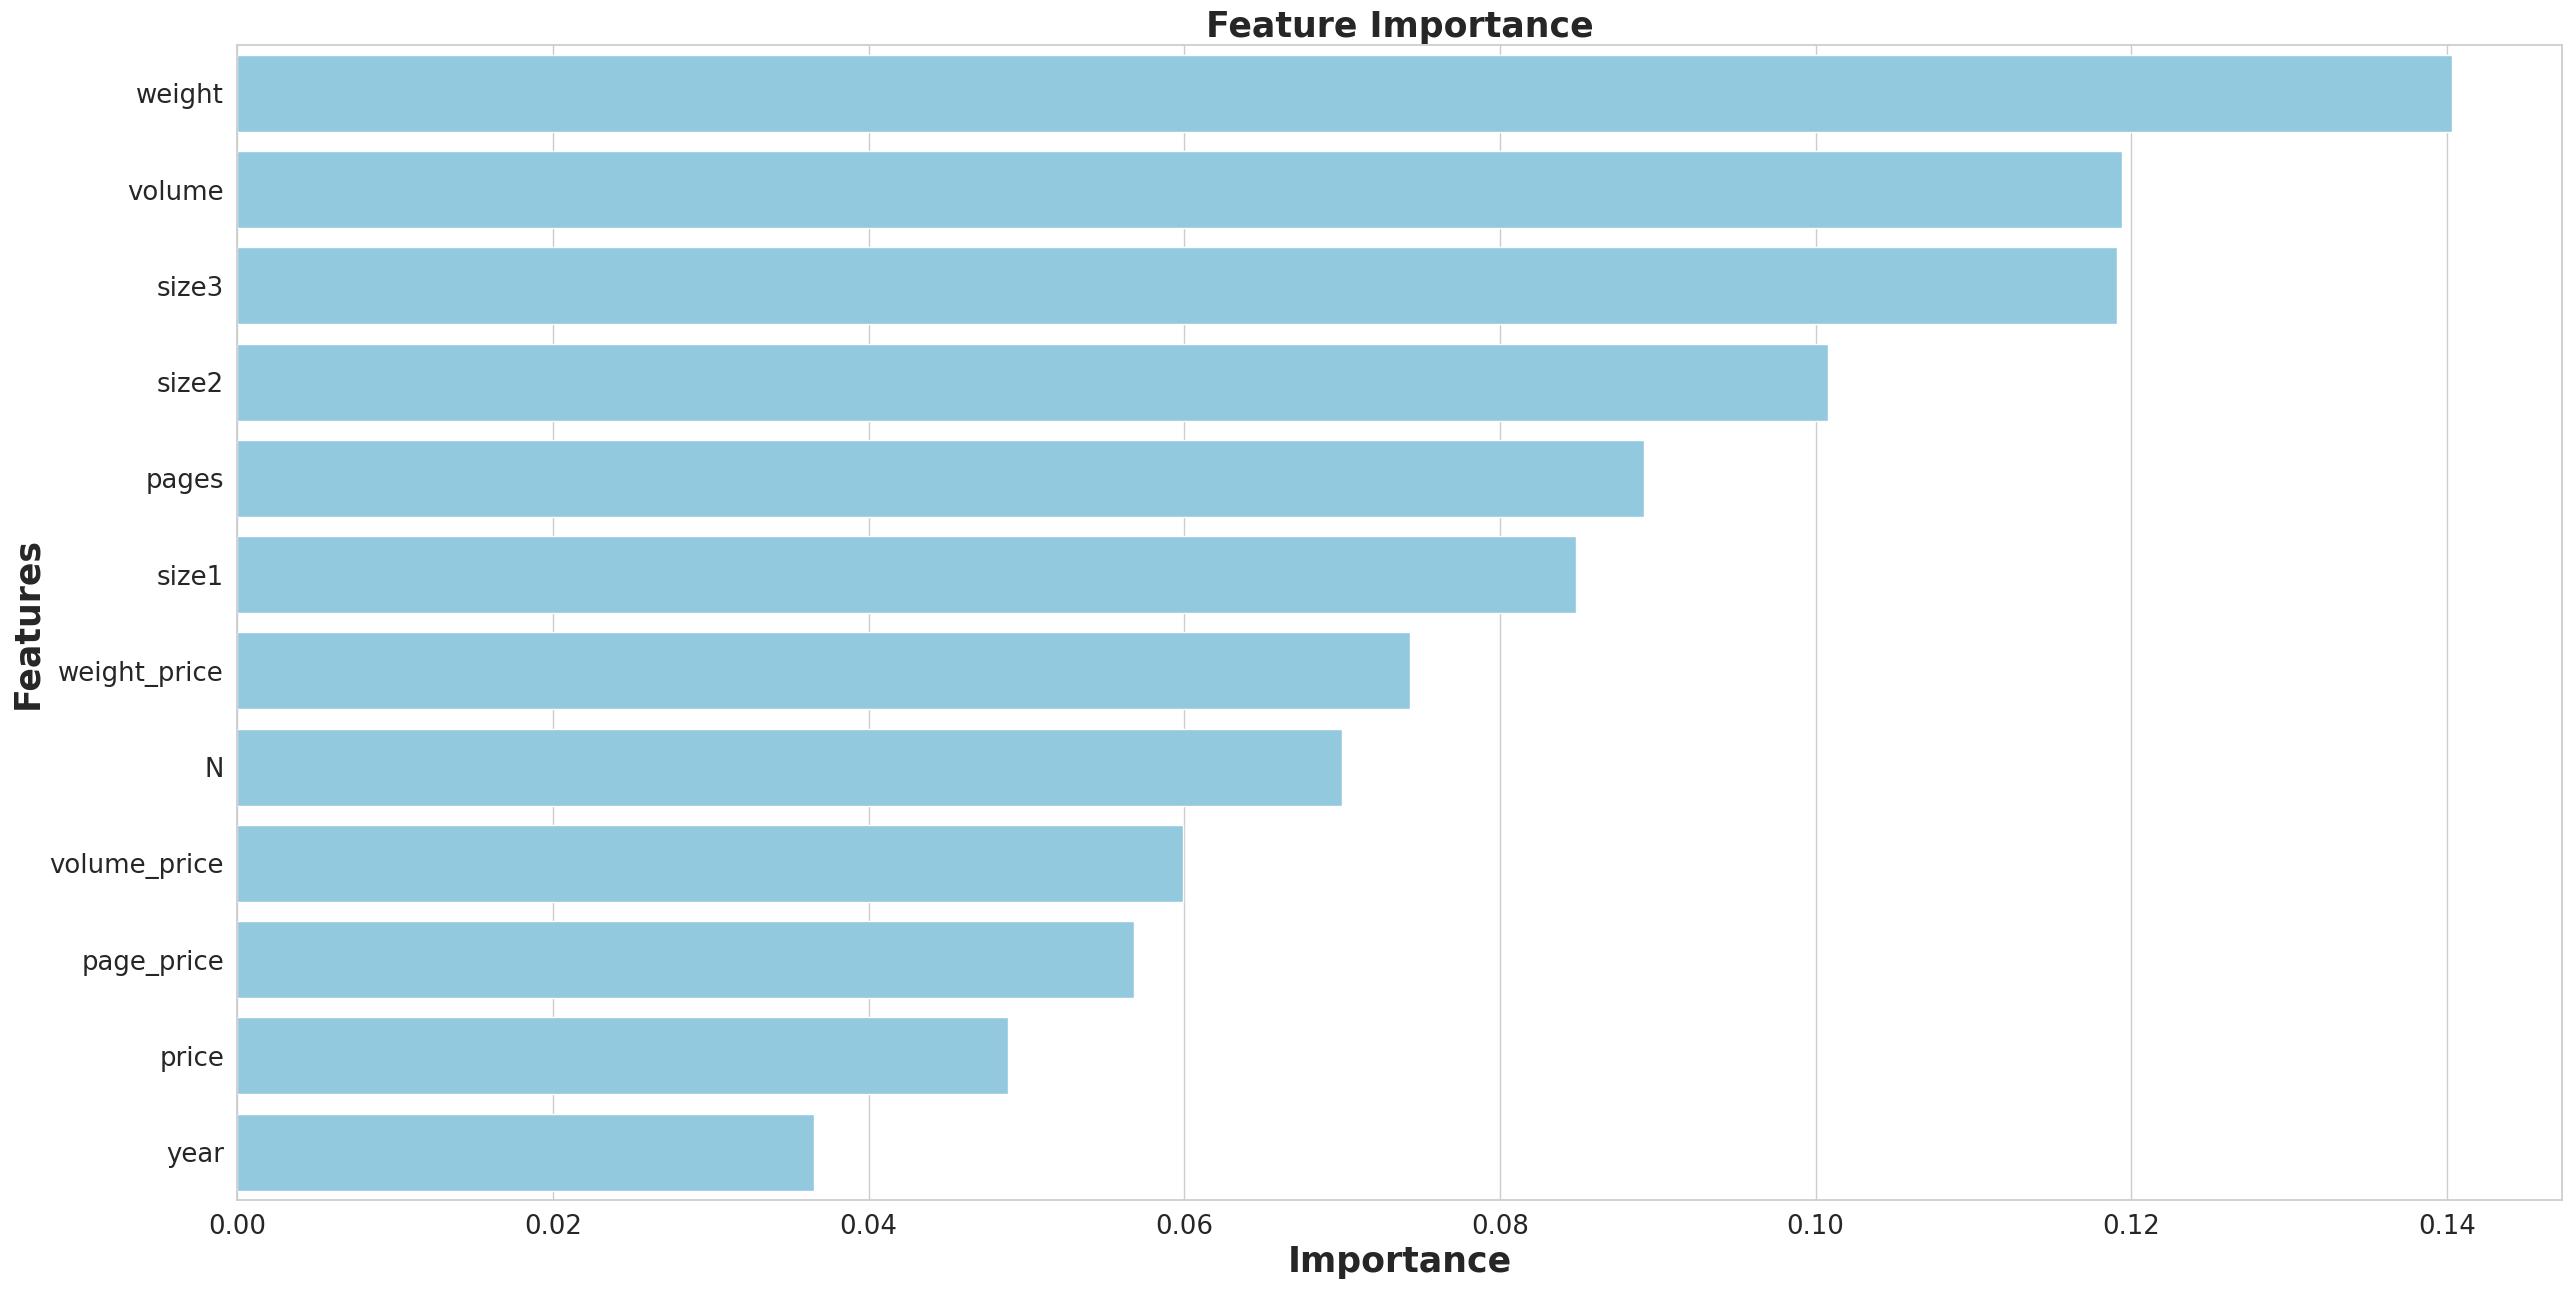

None

,Features,Gini-Importance
0,weight,0.140297
1,volume,0.119429
2,size3,0.119103
3,size2,0.100776
4,pages,0.089108
5,size1,0.084846
6,weight_price,0.074311
7,N,0.069979
8,volume_price,0.059954
9,page_price,0.056821


In [103]:
feats = {}
for feature, importance in zip(df_new.columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)